In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8963 - loss: 0.3337 - val_accuracy: 0.9832 - val_loss: 0.0496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9874 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9906 - loss: 0.0309 - val_accuracy: 0.9877 - val_loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9881 - val_loss: 0.0363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9892 - val_loss: 0.0320


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9865 - loss: 0.0424

Test accuracy: 98.92%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


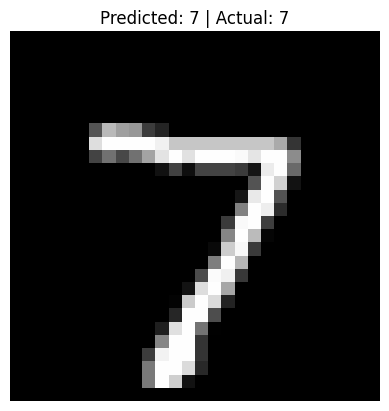

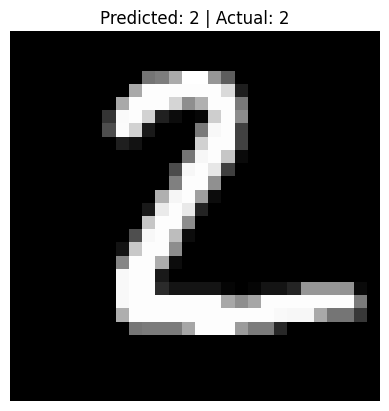

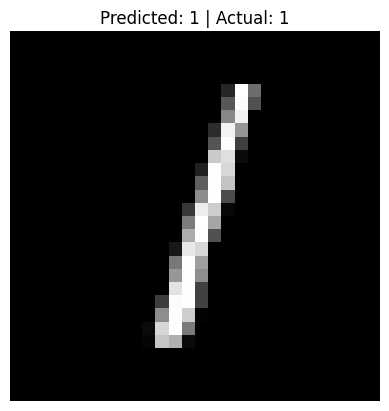

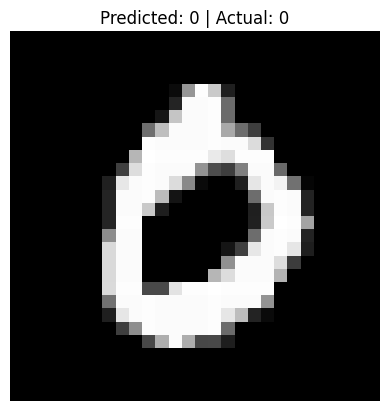

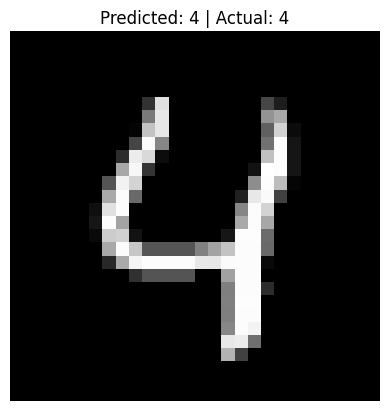

In [10]:
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


In [11]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [15]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.save("mnist_model.h5")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9920 - val_loss: 0.0250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9966 - loss: 0.0095 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9970 - loss: 0.0083 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9901 - val_loss: 0.0378
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9911 - val_loss: 0.0316


In [16]:
import streamlit as st
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("mnist_model.h5")

st.title("MNIST Digit Classifier")

uploaded_file = st.file_uploader("Upload a 28x28 grayscale image", type=["png", "jpg"])

if uploaded_file is not None:
    from PIL import Image
    image = Image.open(uploaded_file).convert("L").resize((28,28))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)

    st.image(image, caption=f"Model Prediction: {predicted_digit}", width=150)


2025-06-21 14:29:58.828 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:58.995 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-21 14:29:58.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:58.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:58.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:58.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:59.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 14:29:59.001 Thread 'MainThread': mi

In [18]:
from google.colab import files
files.download("mnist_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install gradio tensorflow


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load and prepare MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8963 - loss: 0.3324 - val_accuracy: 0.9843 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9839 - loss: 0.0501 - val_accuracy: 0.9892 - val_loss: 0.0311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9916 - val_loss: 0.0253
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9897 - val_loss: 0.0319


In [6]:
def predict_digit(img):
    # Resize and grayscale
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Force black digits on white background (thresholding)
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

    # Normalize and reshape
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img)
    return f"Predicted digit: {np.argmax(prediction)}"


In [5]:
import gradio as gr
import cv2
import numpy as np

def predict_digit(img):
    # Resize and preprocess the image
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Make prediction
    prediction = model.predict(img)
    return f"Predicted digit: {np.argmax(prediction)}"

# Define the interface
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy", image_mode="RGB", label="Draw or Upload a Digit"),
    outputs="text",
    live=True
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://68f132d31766e4896e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
